In [148]:
import networkx as nx
import matplotlib.pyplot as plt
import random

[NetworkX教程](https://www.osgeo.cn/networkx/tutorial.html)


In [149]:
global node_num
node_num = 1000

## 生成ER-随机图

In [150]:
def get_ER_graph(node_num,p):
    G = nx.Graph()
    H = nx.path_graph(node_num)
    G.add_nodes_from(H)
    for i in range(0, node_num):
        for j in range(0, i):
            r = random.random()
            if r < p:
                G.add_edge(i, j)
    return G


In [151]:
G = get_ER_graph(1000, 0.05)

## 计算度-度频率

In [152]:
def get_degree_dict(G):
    dict_degree = {}
    #按"度：频率"生成字典
    for node, degree in list(G.degree()):
        if degree not in dict_degree:
            dict_degree[degree] = 0
        dict_degree[degree] += 1
    #将"度：频数"变为"度：频率"
    for degree, times in dict_degree.items():
        probility = times / node_num
        dict_degree[degree] = probility

    #https://www.php.cn/python-tutorials-422424.html 对字典按键排序
    sorted_degree_dict = sorted(dict_degree.items(), key=lambda x: x[0])
    return sorted_degree_dict


In [153]:
degree_propbility_list = get_degree_dict(G)
with open("degreeDistribution.txt", "w+") as f:
    for degree, probility in degree_propbility_list:
        f.write("{} {:.3f}\n".format(degree, probility))


## 绘制度-度频率图

In [154]:
degree_list = [degree for degree,probility in degree_propbility_list]
probility_list = [probility for degree, probility in degree_propbility_list]

In [155]:
def draw_scatter_plot(x_list, y_list, xlabel,ylabel,title):
    #https://blog.csdn.net/u010472607/article/details/82789887 中文支持
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    
    #https://blog.csdn.net/weixin_43790276/article/details/109459297 绘制散点图
    plt.figure(figsize=(10, 10), dpi=200)
    plt.scatter(x_list, y_list, c='Blue', s=50)
    plt.xticks(range(min(x_list)-2, max(x_list)+2, 2))
    plt.xlabel(xlabel, fontdict={'size': 20})
    plt.ylabel(ylabel, fontdict={'size': 20})
    plt.title(title, fontdict={'size': 25})
    plt.show()


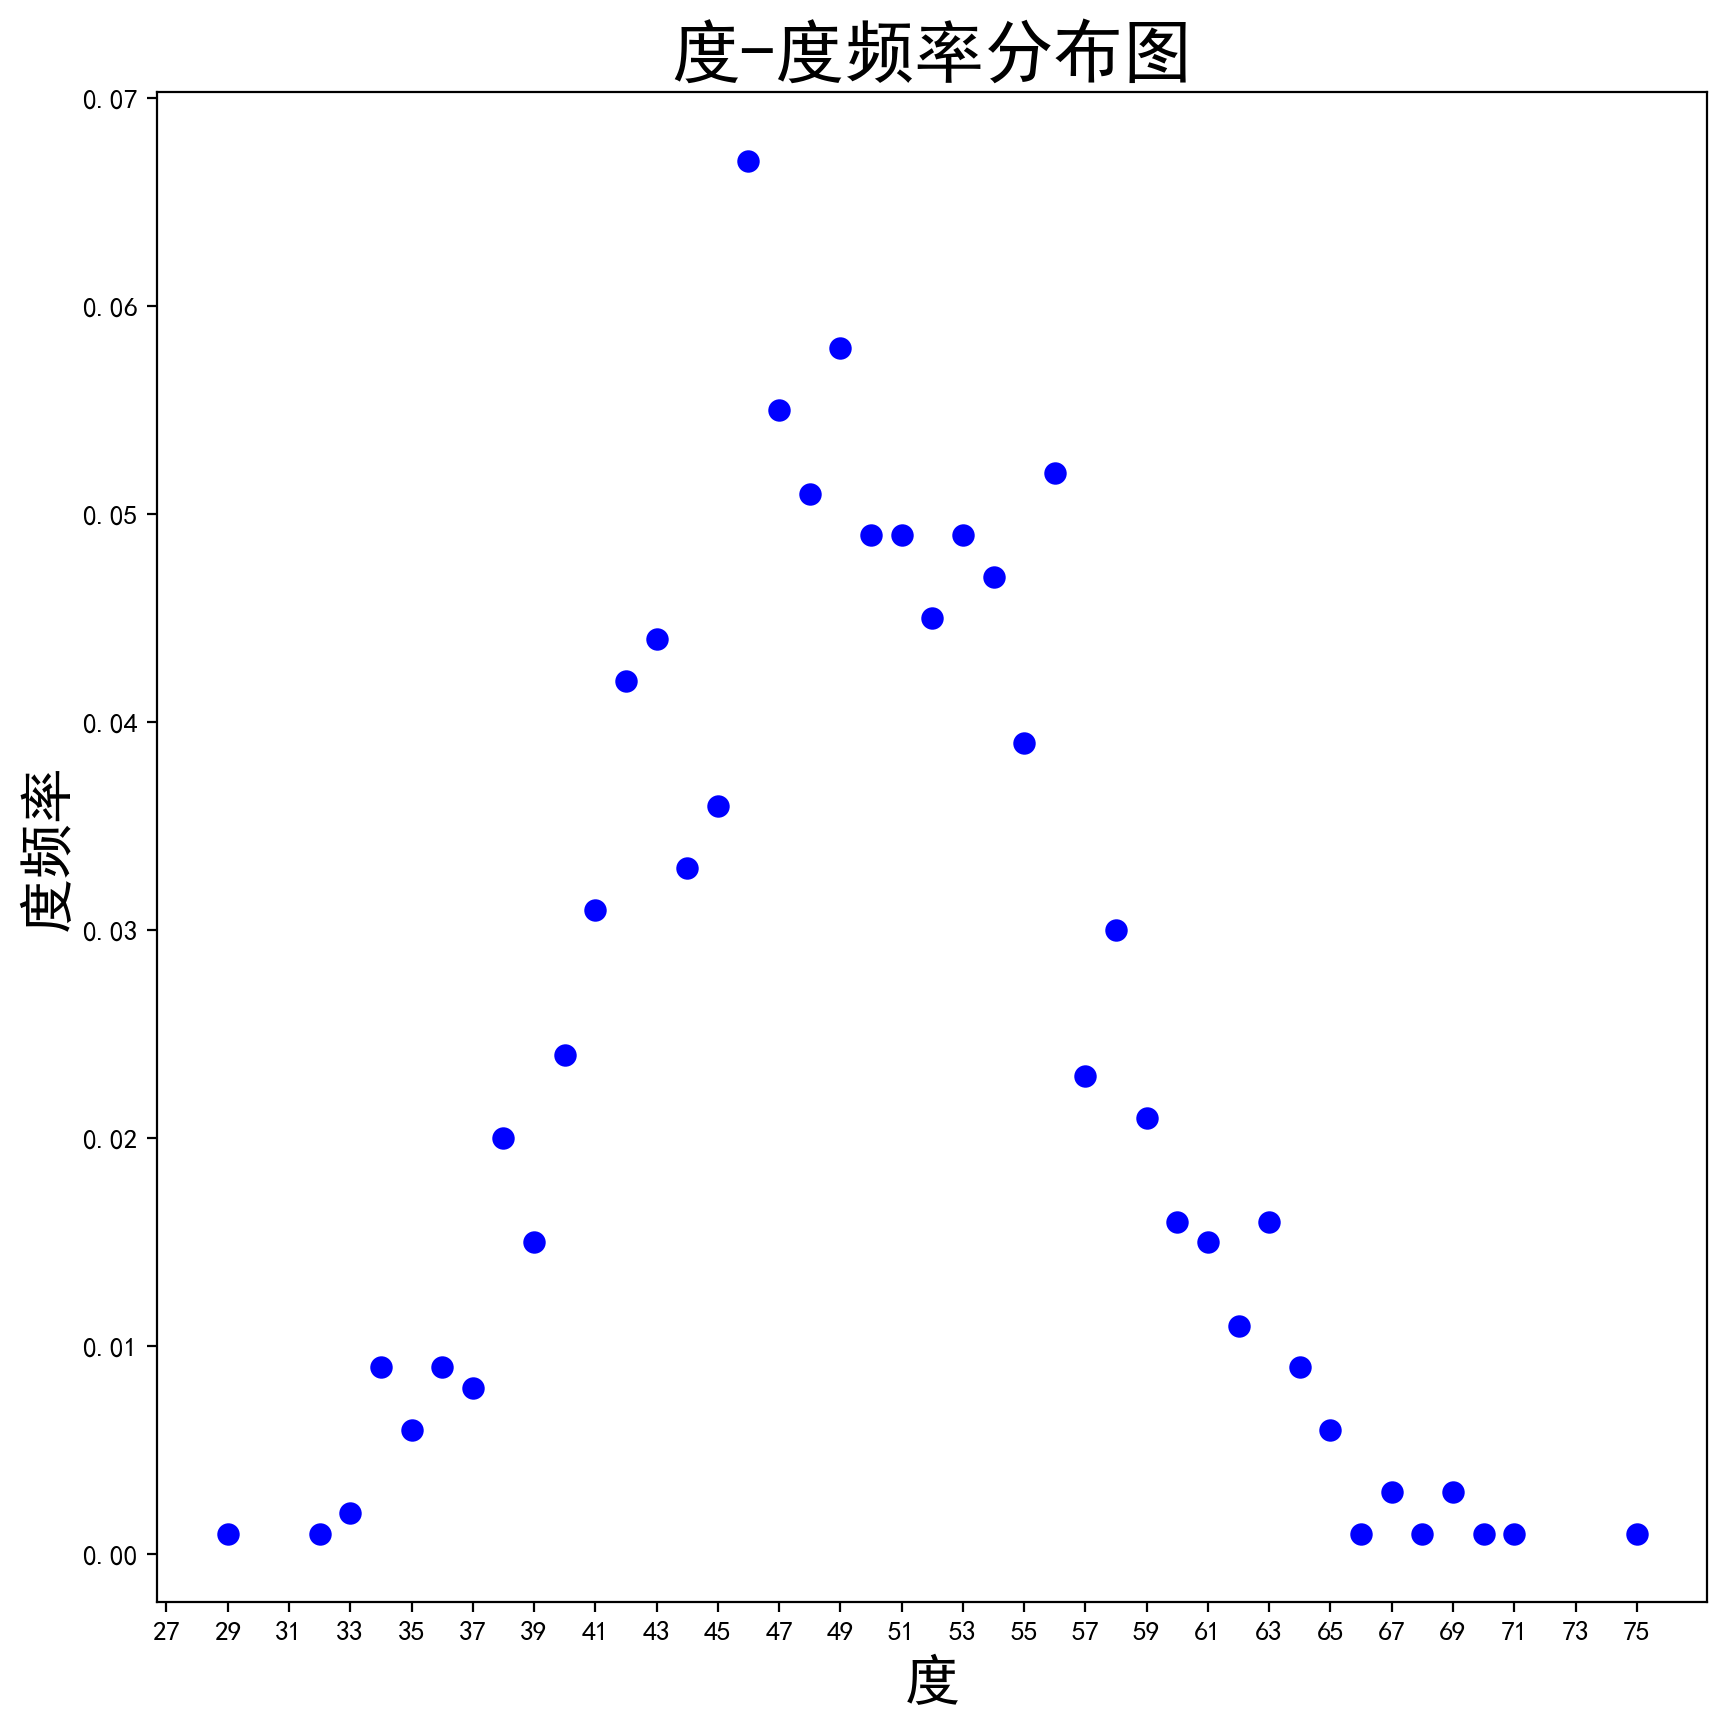

In [156]:
draw_scatter_plot(degree_list,probility_list,xlabel="度",ylabel="度频率",title="度-度频率分布图")

## 计算聚类系数

In [157]:
#https://alphafan.github.io/posts/graph_analysis.html 聚类系数讲解
degrees = [degree for node, degree in list(G.degree())]
clusters = [nx.clustering(G, node) for node in list(G.nodes())]
average_clustering = sum(clusters)/len(clusters)

## 绘制度-聚类系数散点图

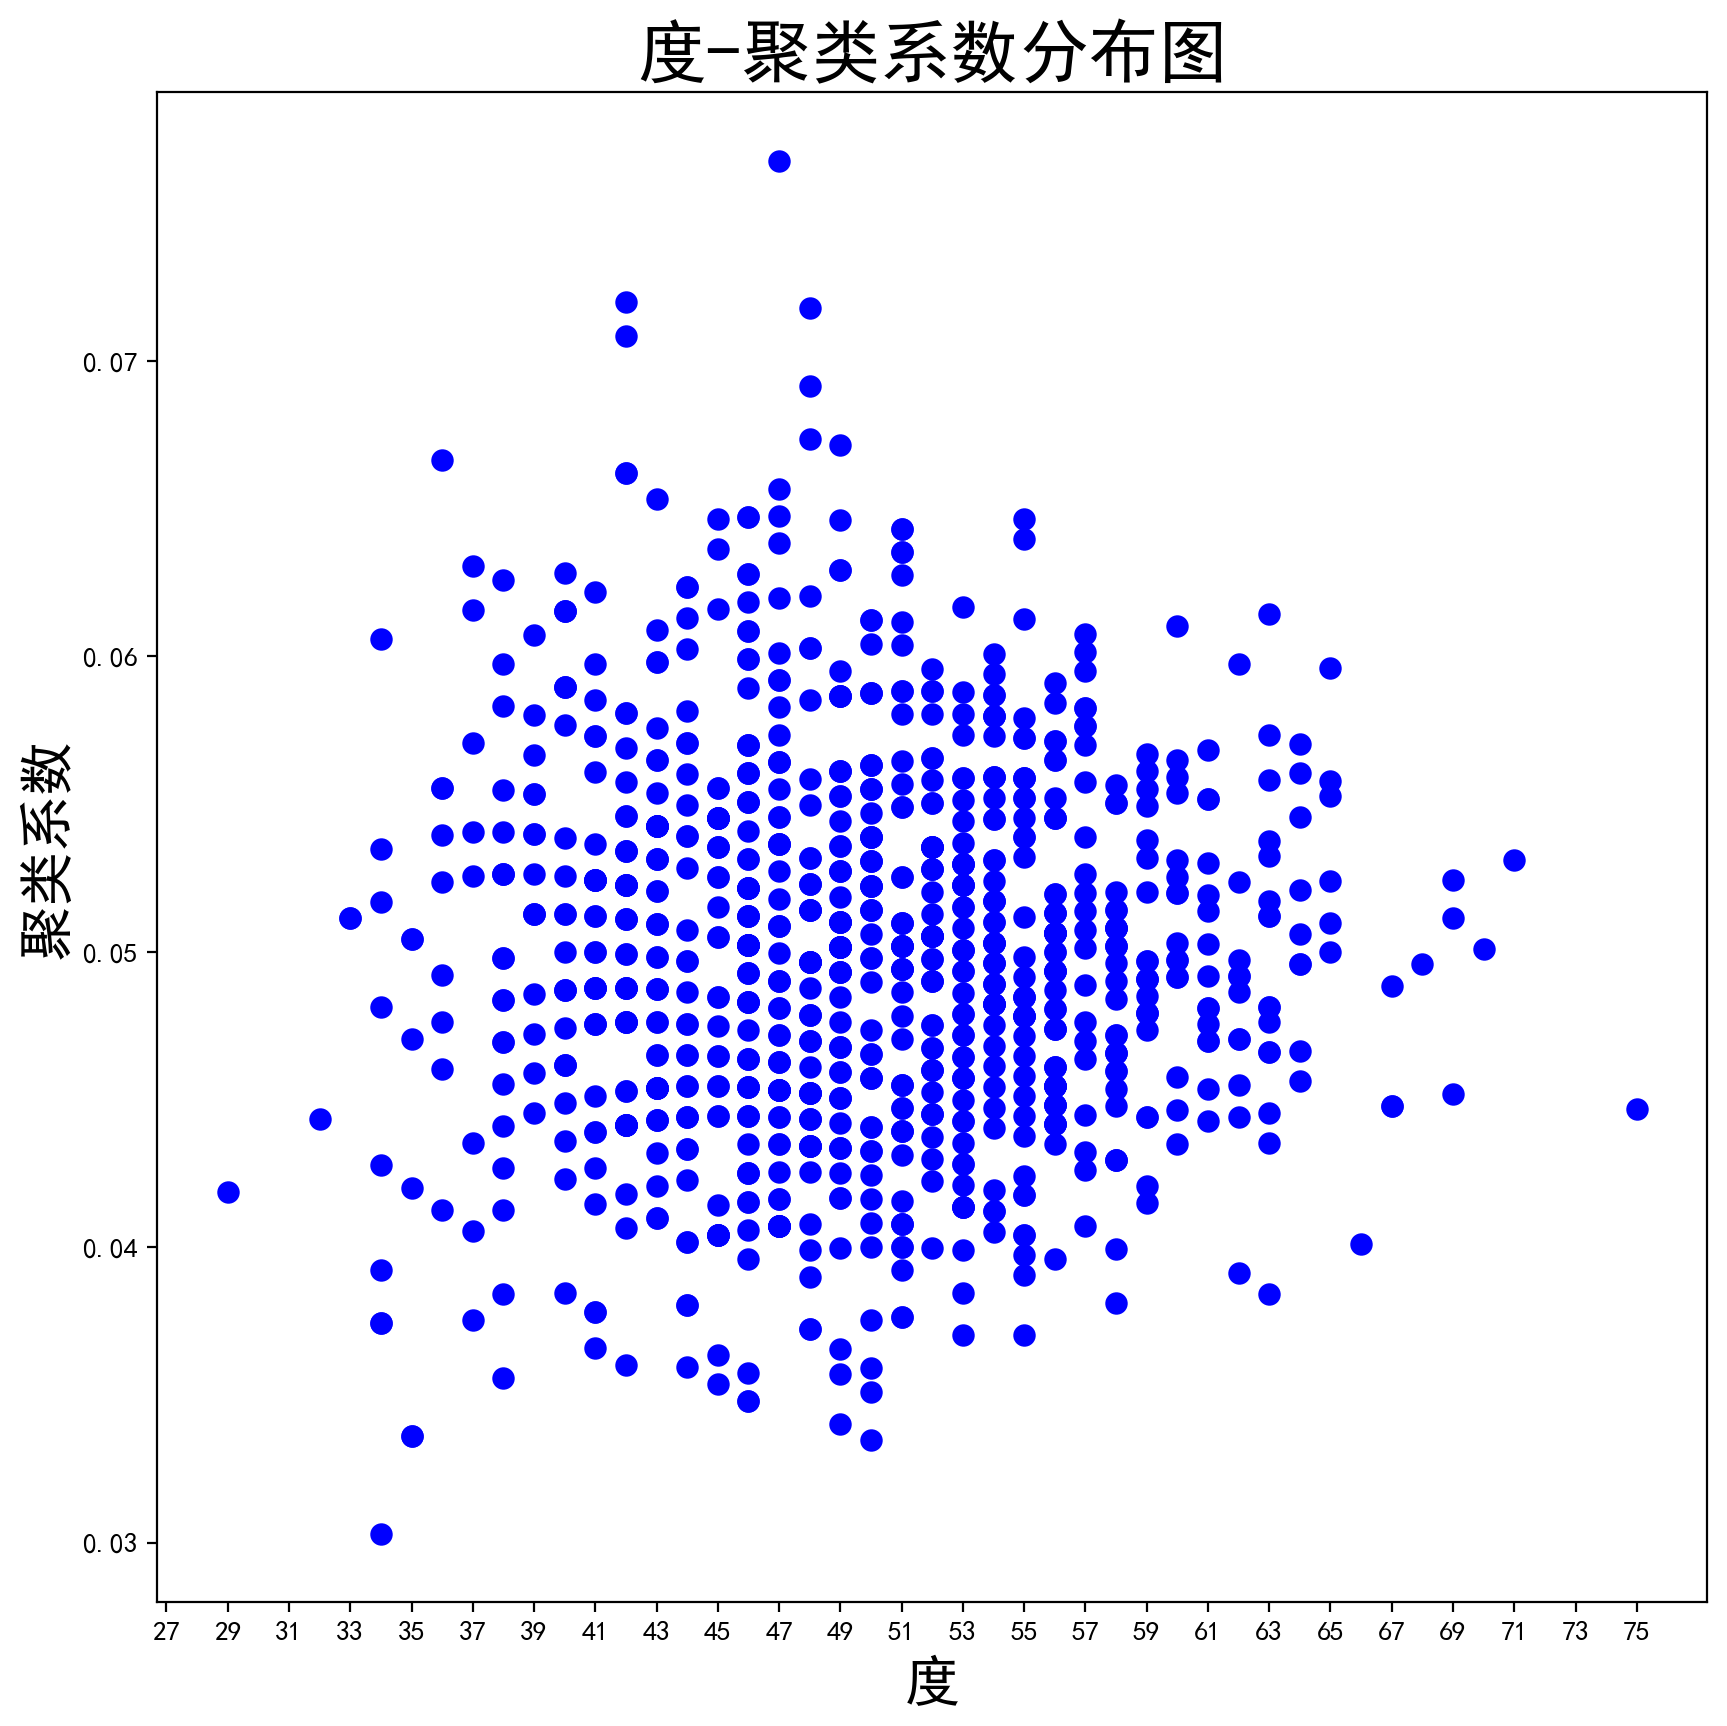

In [158]:
draw_scatter_plot(degrees, clusters, xlabel="度", ylabel="聚类系数", title="度-聚类系数分布图")


## 计算每个节点对之间的最短路径

In [159]:
#https://blog.csdn.net/u011367448/article/details/11481625 

#保存在shortes_path_length.txt中
with open("shortes_path_length.txt", "w") as f:
    for i in range(0, node_num):
        for j in range(0, i):
            path_length = nx.shortest_path_length(G, i, j)
            f.write("{}:{} {}\n".format(i, j, path_length))


## 计算并输出平均路径长度

In [160]:
average_shortest_path_length = nx.average_shortest_path_length(G)
print(average_shortest_path_length)

2.0322822822822824


## 计算同配系数

In [161]:
r = nx.degree_assortativity_coefficient(G)
print(r)


0.0005504883737349307
